# Exercise 0
Already completed in exercise statement

<Figure size 640x480 with 0 Axes>

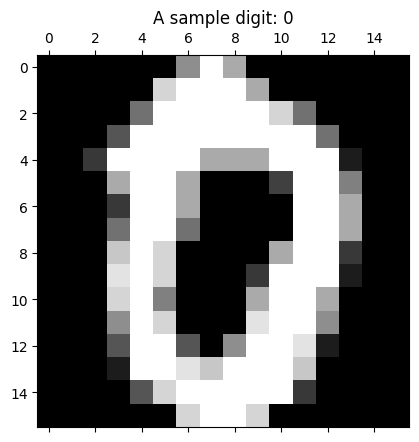

<Figure size 640x480 with 0 Axes>

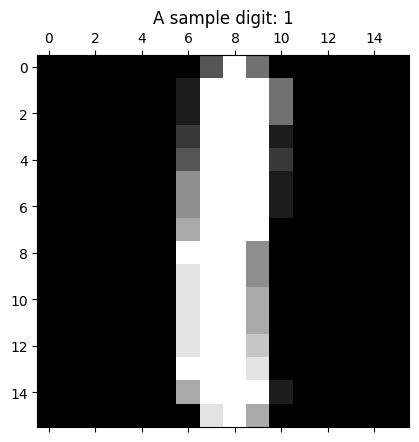

c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reache

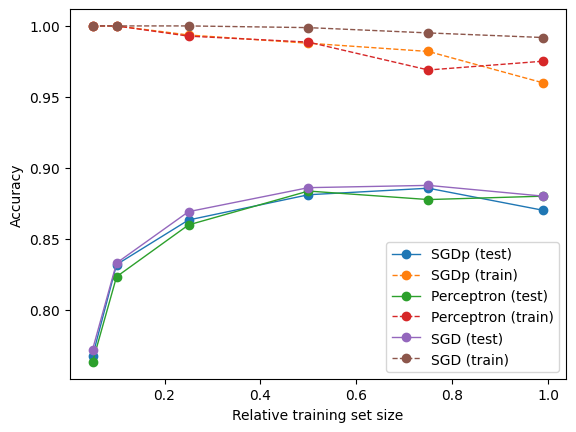

In [2]:
# Initial script
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
@author: 

Example mostly taken from scikit-learn    
"""

from time import time

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.neural_network import MLPClassifier

def get_digit(X,i,dim=8):
    dig = X[i].reshape(dim,dim)
    if dim == 16: dig = dig.T
    return dig

def show_digit(X,i,dim=8):
    """ Auxiliary function to show a digit """
    plt.gray()
    plt.matshow(get_digit(X,i,dim))
    plt.title("A sample digit: "+str(y[i]))
    plt.show()


#%% Load a dataset and plot some samples
d = 16 # choose between using 8x8 or 16x16 digits.
if d == 8:
    digits = datasets.load_digits()
    X, y = digits.data/16, digits.target
else:
    mat = loadmat('mnist16.mat', squeeze_me=True, struct_as_record=False)
    X, y = mat['A'].data/144, mat['A'].nlab - 1


show_digit(X,13,dim=d)
show_digit(X,280,dim=d)


# Plot images of the digits
n_img_per_row = 10
h = d+2 # height/width of each digit 
img = np.zeros(( h * n_img_per_row , h * n_img_per_row ))
for i in range(n_img_per_row):
    ix = h * i + 1
    for j in range(n_img_per_row):
        iy = h * j + 1
        k = np.random.randint(len(X))
        img[ix:ix + d, iy:iy + d] = get_digit(X,k,dim=d)
"""
plt.imshow(img, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
plt.show()
"""

#%%
# Create a list of classifiers
# To add a classifier ad a tuple to the list 'classifiers'.
# The tuple must be of the form:
# ( "NAME" , lw , clf )
# where "NAME" is the name you want to appear in the plots, lw is
# the line width for the plots and clf is the classifier itself, a
# scikit-lear object.

classifiers = [
    ("SGDp",1, SGDClassifier(loss='perceptron', eta0=1, learning_rate='constant', penalty=None)),
    ("Perceptron", 1,Perceptron(tol=1e-5,max_iter=100,eta0=1)),
    ("SGD",1, SGDClassifier(loss='squared_hinge', penalty=None))
]


#%% ---------------------------------------
## Exercise 0
###########################################

heldout = [0.95, 0.9,0.75, 0.50, 0.25, 0.01] # Ratio of samples left out from training, for error estimation
rounds = 5 # Number of repetitions to compute average error


xx = 1. - np.array(heldout)
seed = np.random.randint(100)

for name, lws, clf in classifiers:
    #print("\n   Training %s" % name)
    rng = np.random.RandomState(seed)  #to have the same for all classifiers
    yyTr = []
    yyTs = []
    
    for i in heldout:
        tr_time = 0
    
        ssumTr = 0
        ssumTs = 0
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=rng)

            t_ini = time()
            clf.fit(X_train, y_train)
            tr_time += time() - t_ini

            y_pred = clf.predict(X_test)

            ssumTr += clf.score(X_train,y_train)
            ssumTs += clf.score(X_test,y_test)

        yyTr.append(ssumTr/rounds)
        yyTs.append(ssumTs/rounds)

        #print("Average training time after {} rounds: {}".format(rounds,tr_time/rounds))
        #print("average accuracy: {}".format(yyTs[-1]))
    
    plt.plot(xx, yyTs, '-o',lw=lws ,label=name+' (test)')
    plt.plot(xx, yyTr, '--o',lw=lws, label=name+' (train)')

plt.legend(loc="lower right")
plt.xlabel("Relative training set size")
plt.ylabel("Accuracy")
plt.show()

## Discusión
**Optimización**: 
- Tanto el SGDp como SGD son algoritmos de optimización utilizados principalmente en el entrenamiento de modelos de aprendizaje automático, mientras que el Perceptrón es un algoritmo específico diseñado para la clasificación binaria.

**Gradiente Estocástico vs Aprendizaje Basado en Errores:**
- Tanto **SGDp** como **SGD** utilizan el gradiente estocástico para actualizar los parámetros del modelo durante el entrenemiento. Calculan el gradiente de la función de pérdida con respecto a los parámetros del modelo y luego realizan ajustes basados en este gradiente.
- En contraste, el **Perceptrón** utiliza un enfoque basad en errores. Ajusta iterativamente los pesos del modelo en función de los errores cometidos en la clasificación de ejemplos de entrenamiento. Cuando se comete un error, los pesos se ajustan para que el modelo haga una mejor predicción en el próximo intento.

**Flexibilidad del Modelo:**
- **SGDp** y **SGD** son algoritmos de optimización generalizados que pueden ser utilizados para entrenar una variedad de modelos de aprendizaje automático, incluyendo redes neuronales.
- El **Perceptrón**, por otro lado, es específico para la clasificación binaria y asume que los datos son linealmente separables. Aunque puede no ser efectivo en ciertos casos.

**Convergencia y Estabilidad:**
- **SGDp** y **SGD** están diseñados para converger hacia un mínimo de la función de pérdida, lo que les permite ajustar modelos de manera efectiva en casi todas las situaciones.
- El **Perceptrón** no garantiza la convergencia si los datos no son linealmente separables. Cuando esto se da, el algoritmo oscilará indefinidamente sin alcanzar una solución óptima.

**Respuesta:**
- Con esto en mente, simplemente observando la gráfica y fijándonos en la 'accuracy', el SGP tiene el mayor 'accuracy' respecto a toda las particiones train-test del dataset. También podemos ver como la línea marrón (SGD train) es la más constante y se mantiene superior al resto por o que podemos aceptar que el SGD es la mejor y el mejor clasificador de los que tenemos en la imagen.

# Exercise 1: Single Hidden Layer MLP


In [3]:
# Vamos a asumir que la ejecuci'on es secuencial por lo que X e y est'an definidos y no necesitamos repetir imports
from sklearn.metrics import accuracy_score
# Aqui vamos a declarar todos los par'ametros variables para el MLP
trainSize = 0.8
testSize = 1. - trainSize
neuron_range = range(5,21)
average_accuracy = []
training_times = []

# Separamos el dataset en entrenamiento y testo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=42)

# Inicializamos el MLP con la primera iteracion de  neuronas de la capa oculta
mlp = MLPClassifier(hidden_layer_sizes=(5), max_iter=130, alpha=1e-4, solver='sgd', tol=1e-4, 
                    random_state=1, learning_rate_init=.1) # Si molesta mucho eliminamos el verbose

# Procedemos al bucle principal del ejercicio 1
for neurons in neuron_range:
    mlp.set_params(hidden_layer_sizes=(neurons)) # Setteamos el numero de neuronas de la capa oculata
    start_time = time () # 
    mlp.fit(X_train, y_train) # Entrenamos el modelo
    end_time = time () # 
    training_time = end_time - start_time # Calculamos el tiempo de entrenamiento
    # 
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #
    average_accuracy.append(accuracy)
    training_times.append(training_time)
    #
    print(f"N'umero de neuronas: {neurons} || Accuracy: {accuracy} ||  Training Time: {training_time}\n")
    
# Vamos a mostrar las medias
avg_accuracy = sum(average_accuracy) / len(average_accuracy) 
avg_training_time = sum(training_times) / len(training_times)

print(f'\n\nAverage Accuracy: {avg_accuracy}')
print(f'Average Training Time: {avg_training_time}')


c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 5 || Accuracy: 0.86 ||  Training Time: 0.5045185089111328



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 6 || Accuracy: 0.8475 ||  Training Time: 0.5201315879821777



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 7 || Accuracy: 0.8775 ||  Training Time: 0.5309984683990479



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 8 || Accuracy: 0.875 ||  Training Time: 0.4943807125091553

N'umero de neuronas: 9 || Accuracy: 0.9075 ||  Training Time: 0.5219230651855469



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 10 || Accuracy: 0.915 ||  Training Time: 0.5630083084106445



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 11 || Accuracy: 0.925 ||  Training Time: 0.5431971549987793

N'umero de neuronas: 12 || Accuracy: 0.9375 ||  Training Time: 0.4717540740966797



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 13 || Accuracy: 0.9275 ||  Training Time: 0.5702996253967285



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 14 || Accuracy: 0.915 ||  Training Time: 0.5431525707244873

N'umero de neuronas: 15 || Accuracy: 0.91 ||  Training Time: 0.45771360397338867

N'umero de neuronas: 16 || Accuracy: 0.925 ||  Training Time: 0.4677259922027588

N'umero de neuronas: 17 || Accuracy: 0.93 ||  Training Time: 0.5621912479400635

N'umero de neuronas: 18 || Accuracy: 0.9225 ||  Training Time: 0.49730563163757324

N'umero de neuronas: 19 || Accuracy: 0.915 ||  Training Time: 0.5739755630493164

N'umero de neuronas: 20 || Accuracy: 0.9375 ||  Training Time: 0.5054469108581543



Average Accuracy: 0.90796875
Average Training Time: 0.5204826891422272


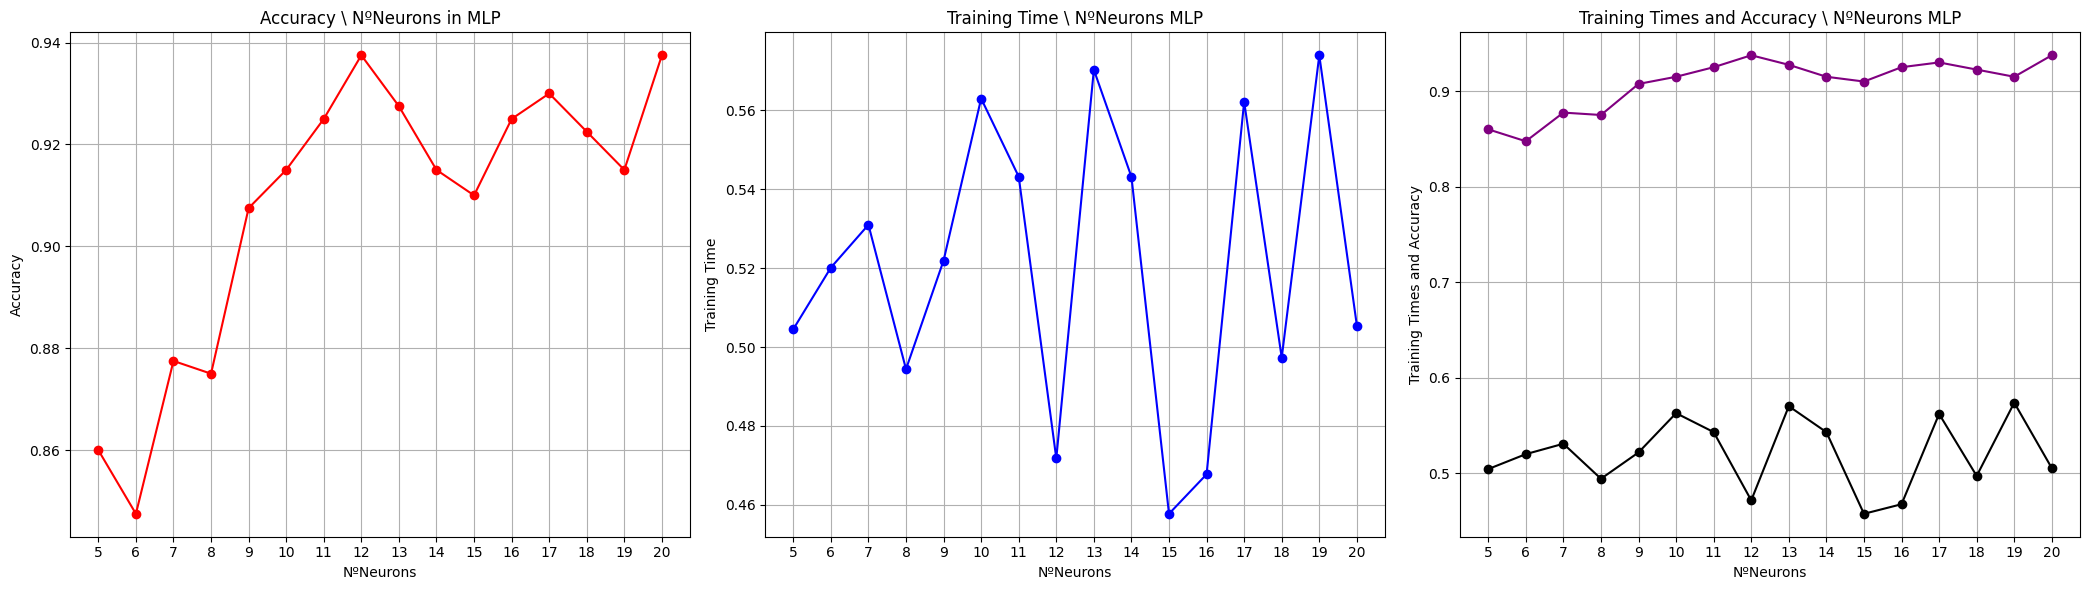

In [4]:
# Una vez hechos hechos los entrenamientos para poder manejar los resultados y gr'aficas vamos a hacer los plots en una celda siguiente al entrenamiento
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 6))

# Gr'afica para la accuracy
ax1.plot(neuron_range, average_accuracy, marker='o', linestyle='-',c='red')
ax1.set_title('Accuracy \ NºNeurons in MLP')
ax1.set_xlabel('NºNeurons')
ax1.set_ylabel('Accuracy')
ax1.set_xticks(neuron_range)
ax1.grid(True)

# Gr'afica para el tiempo de entrenamiento
ax2.plot(neuron_range, training_times, marker='o', linestyle='-', c='blue')
ax2.set_title('Training Time \ NºNeurons MLP')
ax2.set_xlabel('NºNeurons')
ax2.set_ylabel('Training Time')
ax2.set_xticks(neuron_range)
ax2.grid(True)

ax3.plot(neuron_range, average_accuracy, marker='o', linestyle='-', c='purple')
ax3.plot(neuron_range, training_times, marker='o', linestyle='-', c='black')
ax3.set_title('Training Times and Accuracy \ NºNeurons MLP')
ax3.set_xlabel('NºNeurons')
ax3.set_ylabel('Training Times and Accuracy')
ax3.set_xticks(neuron_range)
ax3.grid(True)

plt.tight_layout()
plt.show()


### Discuss 


# Exercise 2

In [5]:
# Vamos a asumir que la ejecuci'on es secuencial por lo que X e y est'an definidos y no necesitamos repetir imports
from sklearn.metrics import accuracy_score
# Aqui vamos a declarar todos los par'ametros variables para el MLP
trainSize = 0.8
testSize = 1. - trainSize
neuron_range = range(5,21)
average_accuracy = []
training_times = []

# Separamos el dataset en entrenamiento y testo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=42)

# Inicializamos el MLP con la primera iteracion de  neuronas de la capa oculta
mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=130, alpha=1e-4, solver='sgd', tol=1e-4, 
                    random_state=1, learning_rate_init=.1) # Si molesta mucho eliminamos el verbose

"""
    {
        "primera hidden layer neurons": (
            average_times,
            training times
        )
    }
"""
pruebas_dict = { i: dict(accuracy=list(), training=list()) for i in neuron_range }

# Procedemos al bucle principal del ejercicio 1
for neurons1 in pruebas_dict.keys():
    for neurons2 in neuron_range:
        mlp.set_params(hidden_layer_sizes=(neurons1,neurons2)) # Setteamos el numero de neuronas de la capa oculata
        start_time = time () # 
        mlp.fit(X_train, y_train) # Entrenamos el modelo
        end_time = time () # 
        training_time = end_time - start_time # Calculamos el tiempo de entrenamiento
        # 
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        #
        pruebas_dict[neurons1]["accuracy"].append(accuracy)
        pruebas_dict[neurons1]["training"].append(training_time)
        #
        print(f"N'umero de neuronas: ({neurons1},{neurons2}) || Accuracy: {accuracy} ||  Training Time: {training_time}\n")
    average_accuracy.append(sum(pruebas_dict[neurons1]["accuracy"]) / len(pruebas_dict[neurons1]["accuracy"]))
    training_times.append(sum(pruebas_dict[neurons1]["training"]) / len(pruebas_dict[neurons1]["training"]))
    
# Vamos a mostrar las medias
avg_accuracy = sum(average_accuracy) / len(average_accuracy) 
avg_training_time = sum(training_times) / len(training_times)

print(f'\n\nAverage Accuracy: {avg_accuracy}')
print(f'Average Training Time: {avg_training_time}')


N'umero de neuronas: (5,5) || Accuracy: 0.72 ||  Training Time: 0.17154860496520996

N'umero de neuronas: (5,6) || Accuracy: 0.72 ||  Training Time: 0.47521495819091797

N'umero de neuronas: (5,7) || Accuracy: 0.685 ||  Training Time: 0.35704922676086426

N'umero de neuronas: (5,8) || Accuracy: 0.725 ||  Training Time: 0.4583621025085449

N'umero de neuronas: (5,9) || Accuracy: 0.865 ||  Training Time: 0.369581937789917

N'umero de neuronas: (5,10) || Accuracy: 0.81 ||  Training Time: 0.23871803283691406



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (5,11) || Accuracy: 0.855 ||  Training Time: 0.5747692584991455

N'umero de neuronas: (5,12) || Accuracy: 0.88 ||  Training Time: 0.1466062068939209

N'umero de neuronas: (5,13) || Accuracy: 0.885 ||  Training Time: 0.14519166946411133

N'umero de neuronas: (5,14) || Accuracy: 0.5575 ||  Training Time: 0.39393067359924316

N'umero de neuronas: (5,15) || Accuracy: 0.6675 ||  Training Time: 0.22095227241516113

N'umero de neuronas: (5,16) || Accuracy: 0.8175 ||  Training Time: 0.3634483814239502

N'umero de neuronas: (5,17) || Accuracy: 0.84 ||  Training Time: 0.38710546493530273



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (5,18) || Accuracy: 0.8875 ||  Training Time: 0.5884342193603516

N'umero de neuronas: (5,19) || Accuracy: 0.63 ||  Training Time: 0.3583528995513916

N'umero de neuronas: (5,20) || Accuracy: 0.86 ||  Training Time: 0.16458654403686523

N'umero de neuronas: (6,5) || Accuracy: 0.3725 ||  Training Time: 0.1672501564025879



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (6,6) || Accuracy: 0.865 ||  Training Time: 0.6165838241577148

N'umero de neuronas: (6,7) || Accuracy: 0.32 ||  Training Time: 0.26807403564453125

N'umero de neuronas: (6,8) || Accuracy: 0.79 ||  Training Time: 0.23138070106506348

N'umero de neuronas: (6,9) || Accuracy: 0.48 ||  Training Time: 0.11170101165771484

N'umero de neuronas: (6,10) || Accuracy: 0.8425 ||  Training Time: 0.3439013957977295



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (6,11) || Accuracy: 0.9025 ||  Training Time: 0.6090843677520752

N'umero de neuronas: (6,12) || Accuracy: 0.8275 ||  Training Time: 0.3091723918914795

N'umero de neuronas: (6,13) || Accuracy: 0.8875 ||  Training Time: 0.28797125816345215



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (6,14) || Accuracy: 0.8975 ||  Training Time: 0.7002806663513184

N'umero de neuronas: (6,15) || Accuracy: 0.18 ||  Training Time: 0.8966939449310303



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (6,16) || Accuracy: 0.845 ||  Training Time: 0.8642935752868652



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (6,17) || Accuracy: 0.8875 ||  Training Time: 0.6611380577087402



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (6,18) || Accuracy: 0.8925 ||  Training Time: 0.6196141242980957

N'umero de neuronas: (6,19) || Accuracy: 0.835 ||  Training Time: 0.1864454746246338

N'umero de neuronas: (6,20) || Accuracy: 0.295 ||  Training Time: 0.1685500144958496

N'umero de neuronas: (7,5) || Accuracy: 0.6175 ||  Training Time: 0.16110682487487793

N'umero de neuronas: (7,6) || Accuracy: 0.0825 ||  Training Time: 0.33765649795532227



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (7,7) || Accuracy: 0.8725 ||  Training Time: 0.5822741985321045



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (7,8) || Accuracy: 0.91 ||  Training Time: 0.5745086669921875

N'umero de neuronas: (7,9) || Accuracy: 0.145 ||  Training Time: 0.22716760635375977

N'umero de neuronas: (7,10) || Accuracy: 0.3925 ||  Training Time: 0.20046305656433105

N'umero de neuronas: (7,11) || Accuracy: 0.91 ||  Training Time: 0.5600461959838867



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (7,12) || Accuracy: 0.8975 ||  Training Time: 0.5972740650177002

N'umero de neuronas: (7,13) || Accuracy: 0.8575 ||  Training Time: 0.18577933311462402

N'umero de neuronas: (7,14) || Accuracy: 0.91 ||  Training Time: 0.4838447570800781

N'umero de neuronas: (7,15) || Accuracy: 0.89 ||  Training Time: 0.5837552547454834

N'umero de neuronas: (7,16) || Accuracy: 0.9125 ||  Training Time: 0.5721526145935059

N'umero de neuronas: (7,17) || Accuracy: 0.925 ||  Training Time: 0.4952704906463623



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (7,18) || Accuracy: 0.885 ||  Training Time: 0.6526672840118408

N'umero de neuronas: (7,19) || Accuracy: 0.9325 ||  Training Time: 0.44312357902526855

N'umero de neuronas: (7,20) || Accuracy: 0.935 ||  Training Time: 0.48981380462646484

N'umero de neuronas: (8,5) || Accuracy: 0.48 ||  Training Time: 0.5111761093139648



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (8,6) || Accuracy: 0.89 ||  Training Time: 0.7590694427490234

N'umero de neuronas: (8,7) || Accuracy: 0.735 ||  Training Time: 0.2085263729095459



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (8,8) || Accuracy: 0.9125 ||  Training Time: 0.6095080375671387

N'umero de neuronas: (8,9) || Accuracy: 0.705 ||  Training Time: 0.1343088150024414



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (8,10) || Accuracy: 0.89 ||  Training Time: 0.6591923236846924

N'umero de neuronas: (8,11) || Accuracy: 0.8925 ||  Training Time: 0.81532883644104

N'umero de neuronas: (8,12) || Accuracy: 0.905 ||  Training Time: 0.550971269607544

N'umero de neuronas: (8,13) || Accuracy: 0.905 ||  Training Time: 0.7121155261993408

N'umero de neuronas: (8,14) || Accuracy: 0.875 ||  Training Time: 0.6951828002929688



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (8,15) || Accuracy: 0.8975 ||  Training Time: 0.6106226444244385

N'umero de neuronas: (8,16) || Accuracy: 0.9125 ||  Training Time: 0.4793376922607422

N'umero de neuronas: (8,17) || Accuracy: 0.9075 ||  Training Time: 0.5621352195739746

N'umero de neuronas: (8,18) || Accuracy: 0.9325 ||  Training Time: 0.5428552627563477

N'umero de neuronas: (8,19) || Accuracy: 0.925 ||  Training Time: 0.4017953872680664

N'umero de neuronas: (8,20) || Accuracy: 0.9225 ||  Training Time: 0.4213268756866455



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (9,5) || Accuracy: 0.89 ||  Training Time: 0.5820248126983643

N'umero de neuronas: (9,6) || Accuracy: 0.9175 ||  Training Time: 0.6935651302337646

N'umero de neuronas: (9,7) || Accuracy: 0.8575 ||  Training Time: 0.3236725330352783

N'umero de neuronas: (9,8) || Accuracy: 0.895 ||  Training Time: 0.5570216178894043

N'umero de neuronas: (9,9) || Accuracy: 0.9125 ||  Training Time: 0.4602775573730469

N'umero de neuronas: (9,10) || Accuracy: 0.9225 ||  Training Time: 0.45508575439453125

N'umero de neuronas: (9,11) || Accuracy: 0.905 ||  Training Time: 0.6867177486419678

N'umero de neuronas: (9,12) || Accuracy: 0.905 ||  Training Time: 0.7975373268127441

N'umero de neuronas: (9,13) || Accuracy: 0.8775 ||  Training Time: 0.36716413497924805

N'umero de neuronas: (9,14) || Accuracy: 0.9175 ||  Training Time: 0.7053873538970947

N'umero de neuronas: (9,15) || Accuracy: 0.93 ||  Training Time: 0.5545308589935303

N'umero de neuronas: (9,16) || Accuracy: 0.95 ||  Tra

c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (10,7) || Accuracy: 0.9075 ||  Training Time: 0.9389536380767822

N'umero de neuronas: (10,8) || Accuracy: 0.895 ||  Training Time: 0.6553881168365479

N'umero de neuronas: (10,9) || Accuracy: 0.4325 ||  Training Time: 0.32994890213012695

N'umero de neuronas: (10,10) || Accuracy: 0.9025 ||  Training Time: 0.7133810520172119

N'umero de neuronas: (10,11) || Accuracy: 0.9125 ||  Training Time: 0.5939149856567383



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (10,12) || Accuracy: 0.9075 ||  Training Time: 0.6931772232055664

N'umero de neuronas: (10,13) || Accuracy: 0.93 ||  Training Time: 0.49527907371520996

N'umero de neuronas: (10,14) || Accuracy: 0.9075 ||  Training Time: 0.6117289066314697

N'umero de neuronas: (10,15) || Accuracy: 0.9125 ||  Training Time: 0.6299192905426025

N'umero de neuronas: (10,16) || Accuracy: 0.925 ||  Training Time: 0.5590999126434326

N'umero de neuronas: (10,17) || Accuracy: 0.94 ||  Training Time: 0.531569242477417

N'umero de neuronas: (10,18) || Accuracy: 0.9375 ||  Training Time: 0.4662911891937256

N'umero de neuronas: (10,19) || Accuracy: 0.93 ||  Training Time: 0.47950315475463867

N'umero de neuronas: (10,20) || Accuracy: 0.775 ||  Training Time: 0.1441786289215088



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (11,5) || Accuracy: 0.8325 ||  Training Time: 0.6233675479888916



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (11,6) || Accuracy: 0.8625 ||  Training Time: 0.6007850170135498

N'umero de neuronas: (11,7) || Accuracy: 0.9125 ||  Training Time: 0.484485387802124



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (11,8) || Accuracy: 0.885 ||  Training Time: 0.6350362300872803

N'umero de neuronas: (11,9) || Accuracy: 0.92 ||  Training Time: 0.5097203254699707



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (11,10) || Accuracy: 0.91 ||  Training Time: 0.6071374416351318

N'umero de neuronas: (11,11) || Accuracy: 0.9125 ||  Training Time: 0.6185519695281982

N'umero de neuronas: (11,12) || Accuracy: 0.93 ||  Training Time: 0.49306464195251465

N'umero de neuronas: (11,13) || Accuracy: 0.915 ||  Training Time: 0.44588804244995117

N'umero de neuronas: (11,14) || Accuracy: 0.925 ||  Training Time: 0.4738595485687256



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (11,15) || Accuracy: 0.91 ||  Training Time: 0.642064094543457

N'umero de neuronas: (11,16) || Accuracy: 0.9225 ||  Training Time: 0.47572755813598633

N'umero de neuronas: (11,17) || Accuracy: 0.93 ||  Training Time: 0.4471914768218994

N'umero de neuronas: (11,18) || Accuracy: 0.9225 ||  Training Time: 0.44274115562438965

N'umero de neuronas: (11,19) || Accuracy: 0.9225 ||  Training Time: 0.4434783458709717

N'umero de neuronas: (11,20) || Accuracy: 0.925 ||  Training Time: 0.5664844512939453



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (12,5) || Accuracy: 0.895 ||  Training Time: 0.6087744235992432

N'umero de neuronas: (12,6) || Accuracy: 0.91 ||  Training Time: 0.532418966293335

N'umero de neuronas: (12,7) || Accuracy: 0.8975 ||  Training Time: 0.5628523826599121

N'umero de neuronas: (12,8) || Accuracy: 0.9 ||  Training Time: 0.5502777099609375

N'umero de neuronas: (12,9) || Accuracy: 0.8875 ||  Training Time: 0.29152512550354004

N'umero de neuronas: (12,10) || Accuracy: 0.9 ||  Training Time: 0.3912479877471924

N'umero de neuronas: (12,11) || Accuracy: 0.925 ||  Training Time: 0.5474631786346436

N'umero de neuronas: (12,12) || Accuracy: 0.8875 ||  Training Time: 0.5881376266479492

N'umero de neuronas: (12,13) || Accuracy: 0.9275 ||  Training Time: 0.4107832908630371

N'umero de neuronas: (12,14) || Accuracy: 0.925 ||  Training Time: 0.5134272575378418

N'umero de neuronas: (12,15) || Accuracy: 0.8975 ||  Training Time: 0.5721166133880615

N'umero de neuronas: (12,16) || Accuracy: 0.92 |

c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (13,5) || Accuracy: 0.8675 ||  Training Time: 0.615908145904541

N'umero de neuronas: (13,6) || Accuracy: 0.7 ||  Training Time: 0.13717341423034668

N'umero de neuronas: (13,7) || Accuracy: 0.9275 ||  Training Time: 0.44849061965942383

N'umero de neuronas: (13,8) || Accuracy: 0.9175 ||  Training Time: 0.4077136516571045

N'umero de neuronas: (13,9) || Accuracy: 0.93 ||  Training Time: 0.42137861251831055

N'umero de neuronas: (13,10) || Accuracy: 0.9025 ||  Training Time: 0.5088298320770264

N'umero de neuronas: (13,11) || Accuracy: 0.925 ||  Training Time: 0.4670722484588623

N'umero de neuronas: (13,12) || Accuracy: 0.8975 ||  Training Time: 0.6130344867706299

N'umero de neuronas: (13,13) || Accuracy: 0.9325 ||  Training Time: 0.41157984733581543

N'umero de neuronas: (13,14) || Accuracy: 0.93 ||  Training Time: 0.4438803195953369

N'umero de neuronas: (13,15) || Accuracy: 0.9375 ||  Training Time: 0.5057361125946045

N'umero de neuronas: (13,16) || Accuracy: 

c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (14,6) || Accuracy: 0.8975 ||  Training Time: 0.6159219741821289

N'umero de neuronas: (14,7) || Accuracy: 0.94 ||  Training Time: 0.44396185874938965

N'umero de neuronas: (14,8) || Accuracy: 0.91 ||  Training Time: 0.46813273429870605



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (14,9) || Accuracy: 0.9 ||  Training Time: 0.6293067932128906

N'umero de neuronas: (14,10) || Accuracy: 0.9225 ||  Training Time: 0.43050312995910645

N'umero de neuronas: (14,11) || Accuracy: 0.9225 ||  Training Time: 0.41706109046936035

N'umero de neuronas: (14,12) || Accuracy: 0.92 ||  Training Time: 0.5730736255645752

N'umero de neuronas: (14,13) || Accuracy: 0.9125 ||  Training Time: 0.3888859748840332

N'umero de neuronas: (14,14) || Accuracy: 0.95 ||  Training Time: 0.39738893508911133

N'umero de neuronas: (14,15) || Accuracy: 0.9275 ||  Training Time: 0.39830589294433594

N'umero de neuronas: (14,16) || Accuracy: 0.92 ||  Training Time: 0.512242317199707

N'umero de neuronas: (14,17) || Accuracy: 0.9375 ||  Training Time: 0.5067489147186279

N'umero de neuronas: (14,18) || Accuracy: 0.9425 ||  Training Time: 0.3331410884857178

N'umero de neuronas: (14,19) || Accuracy: 0.92 ||  Training Time: 0.4474794864654541

N'umero de neuronas: (14,20) || Accuracy:

c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (15,5) || Accuracy: 0.8725 ||  Training Time: 0.6116194725036621

N'umero de neuronas: (15,6) || Accuracy: 0.9225 ||  Training Time: 0.503441333770752

N'umero de neuronas: (15,7) || Accuracy: 0.905 ||  Training Time: 0.513775110244751

N'umero de neuronas: (15,8) || Accuracy: 0.9075 ||  Training Time: 0.44765520095825195

N'umero de neuronas: (15,9) || Accuracy: 0.925 ||  Training Time: 0.49637341499328613

N'umero de neuronas: (15,10) || Accuracy: 0.9175 ||  Training Time: 0.3987603187561035

N'umero de neuronas: (15,11) || Accuracy: 0.915 ||  Training Time: 0.39563441276550293

N'umero de neuronas: (15,12) || Accuracy: 0.9175 ||  Training Time: 0.5031638145446777

N'umero de neuronas: (15,13) || Accuracy: 0.93 ||  Training Time: 0.44428038597106934

N'umero de neuronas: (15,14) || Accuracy: 0.92 ||  Training Time: 0.46281933784484863

N'umero de neuronas: (15,15) || Accuracy: 0.92 ||  Training Time: 0.3994731903076172

N'umero de neuronas: (15,16) || Accuracy: 0

c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (16,5) || Accuracy: 0.91 ||  Training Time: 0.6154811382293701

N'umero de neuronas: (16,6) || Accuracy: 0.92 ||  Training Time: 0.48050355911254883

N'umero de neuronas: (16,7) || Accuracy: 0.9075 ||  Training Time: 0.38022899627685547

N'umero de neuronas: (16,8) || Accuracy: 0.925 ||  Training Time: 0.43274426460266113

N'umero de neuronas: (16,9) || Accuracy: 0.9 ||  Training Time: 0.6036128997802734

N'umero de neuronas: (16,10) || Accuracy: 0.9325 ||  Training Time: 0.34707140922546387

N'umero de neuronas: (16,11) || Accuracy: 0.9525 ||  Training Time: 0.4647555351257324

N'umero de neuronas: (16,12) || Accuracy: 0.8 ||  Training Time: 0.3411684036254883

N'umero de neuronas: (16,13) || Accuracy: 0.9225 ||  Training Time: 0.4297168254852295

N'umero de neuronas: (16,14) || Accuracy: 0.9175 ||  Training Time: 0.48932409286499023

N'umero de neuronas: (16,15) || Accuracy: 0.9175 ||  Training Time: 0.46439433097839355

N'umero de neuronas: (16,16) || Accuracy: 

c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (17,5) || Accuracy: 0.8975 ||  Training Time: 0.6189508438110352



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (17,6) || Accuracy: 0.9225 ||  Training Time: 0.6165590286254883



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (17,7) || Accuracy: 0.9025 ||  Training Time: 0.6425831317901611

N'umero de neuronas: (17,8) || Accuracy: 0.9075 ||  Training Time: 0.5917415618896484



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (17,9) || Accuracy: 0.865 ||  Training Time: 0.62701416015625

N'umero de neuronas: (17,10) || Accuracy: 0.925 ||  Training Time: 0.5345942974090576

N'umero de neuronas: (17,11) || Accuracy: 0.94 ||  Training Time: 0.5351080894470215

N'umero de neuronas: (17,12) || Accuracy: 0.9275 ||  Training Time: 0.4339737892150879

N'umero de neuronas: (17,13) || Accuracy: 0.9125 ||  Training Time: 0.5711781978607178

N'umero de neuronas: (17,14) || Accuracy: 0.915 ||  Training Time: 0.49698710441589355

N'umero de neuronas: (17,15) || Accuracy: 0.915 ||  Training Time: 0.39646267890930176

N'umero de neuronas: (17,16) || Accuracy: 0.925 ||  Training Time: 0.5057785511016846

N'umero de neuronas: (17,17) || Accuracy: 0.94 ||  Training Time: 0.4472949504852295

N'umero de neuronas: (17,18) || Accuracy: 0.9175 ||  Training Time: 0.3453240394592285

N'umero de neuronas: (17,19) || Accuracy: 0.92 ||  Training Time: 0.41100215911865234

N'umero de neuronas: (17,20) || Accuracy: 0

c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (18,5) || Accuracy: 0.885 ||  Training Time: 0.6406359672546387

N'umero de neuronas: (18,6) || Accuracy: 0.905 ||  Training Time: 0.6101255416870117

N'umero de neuronas: (18,7) || Accuracy: 0.9075 ||  Training Time: 0.4797697067260742

N'umero de neuronas: (18,8) || Accuracy: 0.9025 ||  Training Time: 0.40302228927612305

N'umero de neuronas: (18,9) || Accuracy: 0.92 ||  Training Time: 0.4581420421600342

N'umero de neuronas: (18,10) || Accuracy: 0.935 ||  Training Time: 0.4092376232147217

N'umero de neuronas: (18,11) || Accuracy: 0.925 ||  Training Time: 0.4331989288330078

N'umero de neuronas: (18,12) || Accuracy: 0.925 ||  Training Time: 0.4562835693359375

N'umero de neuronas: (18,13) || Accuracy: 0.9375 ||  Training Time: 0.4957127571105957

N'umero de neuronas: (18,14) || Accuracy: 0.94 ||  Training Time: 0.43184566497802734

N'umero de neuronas: (18,15) || Accuracy: 0.915 ||  Training Time: 0.44976162910461426

N'umero de neuronas: (18,16) || Accuracy: 0.

c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: (19,7) || Accuracy: 0.915 ||  Training Time: 0.6721620559692383

N'umero de neuronas: (19,8) || Accuracy: 0.915 ||  Training Time: 0.6204550266265869

N'umero de neuronas: (19,9) || Accuracy: 0.925 ||  Training Time: 0.44921255111694336

N'umero de neuronas: (19,10) || Accuracy: 0.9325 ||  Training Time: 0.3849978446960449

N'umero de neuronas: (19,11) || Accuracy: 0.925 ||  Training Time: 0.41166257858276367

N'umero de neuronas: (19,12) || Accuracy: 0.9475 ||  Training Time: 0.43131017684936523

N'umero de neuronas: (19,13) || Accuracy: 0.95 ||  Training Time: 0.38515543937683105

N'umero de neuronas: (19,14) || Accuracy: 0.9425 ||  Training Time: 0.37076473236083984

N'umero de neuronas: (19,15) || Accuracy: 0.93 ||  Training Time: 0.40862369537353516

N'umero de neuronas: (19,16) || Accuracy: 0.935 ||  Training Time: 0.44924092292785645

N'umero de neuronas: (19,17) || Accuracy: 0.9425 ||  Training Time: 0.45626235008239746

N'umero de neuronas: (19,18) || Accu

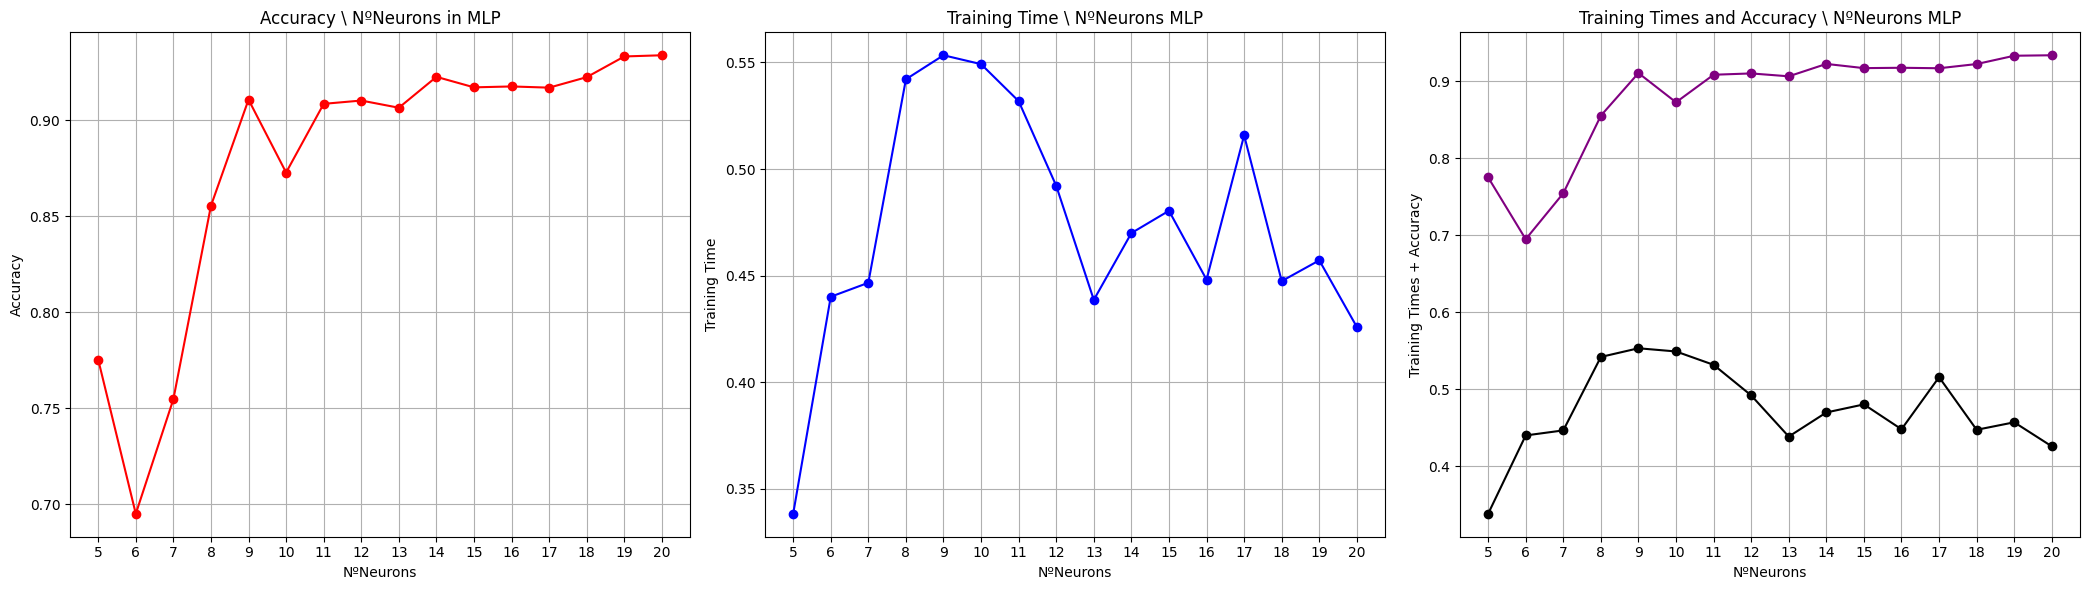

[]

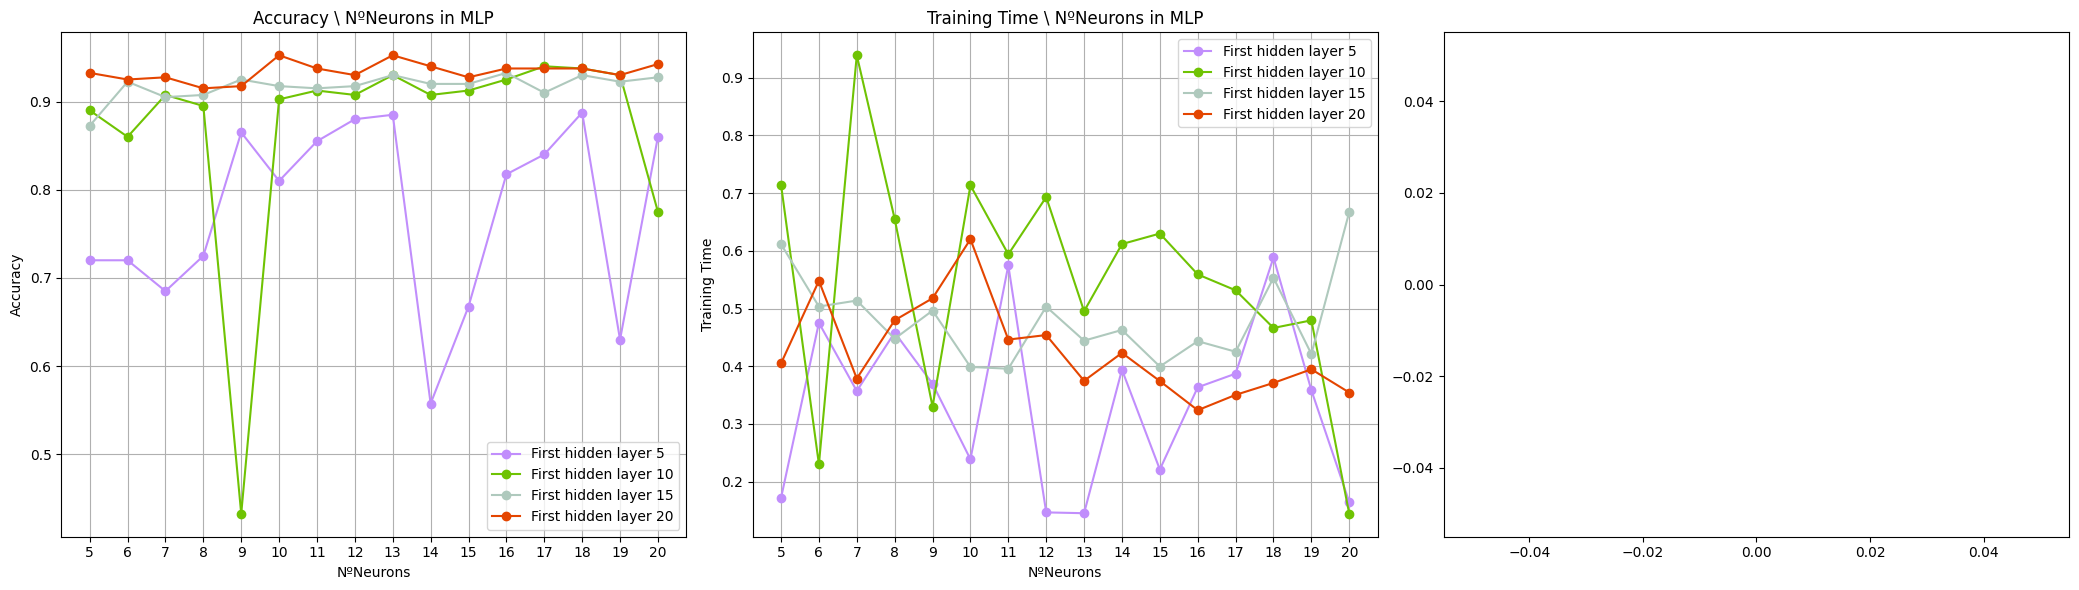

In [6]:
# Una vez hechos hechos los entrenamientos para poder manejar los resultados y gr'aficas vamos a hacer los plots en una celda siguiente al entrenamiento
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 6))

# Gr'afica para la accuracy
ax1.plot(neuron_range, average_accuracy, marker='o', linestyle='-',c='red')
ax1.set_title('Accuracy \ NºNeurons in MLP')
ax1.set_xlabel('NºNeurons')
ax1.set_ylabel('Accuracy')
ax1.set_xticks(neuron_range)
ax1.grid(True)

# Gr'afica para el tiempo de entrenamiento
ax2.plot(neuron_range, training_times, marker='o', linestyle='-', c='blue')
ax2.set_title('Training Time \ NºNeurons MLP')
ax2.set_xlabel('NºNeurons')
ax2.set_ylabel('Training Time')
ax2.set_xticks(neuron_range)
ax2.grid(True)

ax3.plot(neuron_range, average_accuracy, marker='o', linestyle='-', c='purple')
ax3.plot(neuron_range, training_times, marker='o', linestyle='-', c='black')
ax3.set_title('Training Times and Accuracy \ NºNeurons MLP')
ax3.set_xlabel('NºNeurons')
ax3.set_ylabel('Training Times + Accuracy')
ax3.set_xticks(neuron_range)
ax3.grid(True)

plt.tight_layout()
plt.show()

colors = [ (np.random.random(), np.random.random(), np.random.random()) for _ in neuron_range ]

fig, (comp1, comp2, comp3) = plt.subplots(1,3, figsize=(21,6))
for i, (key, times) in enumerate(pruebas_dict.items()):
    if key % 5 == 0:
        comp1.plot(neuron_range, 
               times['accuracy'], 
               marker='o', 
               linestyle='-', 
               c=colors[i], 
               label=f"First hidden layer {key}")

comp1.set_title('Accuracy \ NºNeurons in MLP')
comp1.set_xlabel('NºNeurons')
comp1.set_ylabel('Accuracy')
comp1.set_xticks(neuron_range)
comp1.legend()
comp1.grid(True)

for i, (key, times) in enumerate(pruebas_dict.items()):
    if key % 5 == 0:
        comp2.plot(neuron_range, times["training"], marker='o', linestyle='-', c=colors[i], label=f"First hidden layer {key}")

comp2.set_title('Training Time \ NºNeurons in MLP')
comp2.set_xlabel('NºNeurons')
comp2.set_ylabel('Training Time')
comp2.set_xticks(neuron_range)
comp2.legend()
comp2.grid(True)

"""
for i, (key, times) in enumerate(pruebas_dict.items()):
    if key % 5 == 0:
        comp3.plot(neuron_range, times["training"], marker='o', linestyle='-', c=colors[i])
        comp3.plot(neuron_range, times["accuracy"], marker='o', linestyle='-', c=colors[i], label=f"First hidden layer {key}")

comp3.set_title('Training Times and Accuracy \ NºNeurons MLP')
comp3.set_xlabel('NºNeurons')
comp3.set_ylabel('Training Times + Accuracy')
comp3.set_xticks(neuron_range)
comp3.legend()
comp3.grid(True)
"""
plt.tight_layout()
plt.plot()

### Discuss
Viendo los dos pares de gráficas podemos sin dudas que usando la segunda capa oculta de neuronas observamos como tenemos la óptima 'accuracy' así como el menor tiempo de entrenamiento en relación 'accuracy'\ 'tiempo entrenamiento'

# Exercise 3